**GETTING THE DATA**


In [ ]:
import json
import requests
import pandas as pd

resp = requests.get('https://services.swpc.noaa.gov/products/solar-wind/plasma-1-day.json')
datos=json.loads(resp.content)
datos
resp2 = requests.get('https://services.swpc.noaa.gov/products/solar-wind/mag-1-day.json')
datos_posicion=json.loads(resp2.content)
datos_posicion

req_Kp = requests.get('https://www-app3.gfz-potsdam.de/kp_index/Kp_ap_nowcast.txt')


In [ ]:
df_temperatura= pd.DataFrame(datos)
df_temperatura.columns=df_temperatura.iloc[0].values
df_temperatura=df_temperatura.drop(df_temperatura.index[0])

In [ ]:
df_temperatura

,time_tag,density,speed,temperature
1,2022-10-01 14:47:00.000,0.22,456.1,336261
2,2022-10-01 14:48:00.000,0.20,440.6,164313
3,2022-10-01 14:49:00.000,0.24,408.2,156674
4,2022-10-01 14:50:00.000,0.19,465.8,359490
5,2022-10-01 14:51:00.000,0.15,473.1,313751
...,...,...,...,...
1385,2022-10-02 14:40:00.000,1.41,449.4,189943
1386,2022-10-02 14:41:00.000,1.33,451.1,205498
1387,2022-10-02 14:42:00.000,1.35,447.6,241105
1388,2022-10-02 14:43:00.000,1.27,440.6,199189


In [ ]:
df_posicion= pd.DataFrame(datos_posicion)
df_posicion.columns=df_posicion.iloc[0].values
df_posicion=df_posicion.drop(df_posicion.index[0])
df_posicion

,time_tag,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
1,2022-10-01 14:47:00.000,-6.20,-2.59,-0.15,202.63,-1.24,6.72
2,2022-10-01 14:48:00.000,-6.34,-2.05,0.44,197.88,3.79,6.68
3,2022-10-01 14:49:00.000,-6.44,-2.13,0.32,198.27,2.67,6.79
4,2022-10-01 14:50:00.000,-6.38,-2.21,0.25,199.08,2.08,6.76
5,2022-10-01 14:52:00.000,-6.26,-2.25,0.23,199.73,1.97,6.66
...,...,...,...,...,...,...,...
1412,2022-10-02 14:40:00.000,-4.65,4.68,-0.99,134.79,-8.56,6.67
1413,2022-10-02 14:41:00.000,-5.23,4.12,-1.12,141.79,-9.55,6.75
1414,2022-10-02 14:42:00.000,-5.17,3.98,-1.22,142.35,-10.60,6.64
1415,2022-10-02 14:43:00.000,-5.55,3.41,-1.59,148.49,-13.68,6.70


**WEARE GONNA WORK WITH THE DF_TEMPERATURA**

**FIXING THE DATA**

In [ ]:
#we are taking just the hour the measuring is taken by the solar parke probe 
df_time=df_temperatura.time_tag.values

for tiempos in range(df_time.size):
   df_time[tiempos]=df_time[tiempos][11:16].replace(":",".")
df_time

array(['14.47', '14.48', '14.49', ..., '14.42', '14.43', '14.44'],
      dtype=object)

In [ ]:
df_temperatura["time_tag"]=df_time#we replace the column with the date with the hour and minute the solar parker probe is measuring 

**CLEANING THE DATA**

In [ ]:
def clean_data(columna):
  """this funtion helps to replace the nulls values and prevents problems during the execution of the code """
  df_temperatura[columna][df_temperatura[columna].isnull()]=0.0 

In [ ]:
#we are transforming into integers the data because it was a string and we need the data as a integer to continue with the process
def integer_trans(parametro):
  """this funtion will help to transfor from string to integer a column"""
  parametros=df_temperatura[parametro].values
  for index_para in range(parametros.size):
    parametros[index_para]=int(parametros[index_para])
  df_temperatura[parametro]=parametros

In [ ]:
#we are transforming into integers the data because it was a string and we need the data as a integer to continue with the process
def float_trans(parametro):
  """this funtion will help to transfor from string to integer a column"""
  parametros=df_temperatura[parametro].values
  for index_para in range(parametros.size):
    parametros[index_para]=float(parametros[index_para])
  df_temperatura[parametro]=parametros

In [ ]:
def replace_cero(columna):
  """this funtion will replace the zero values for the median of the column values """
  df_temperatura[columna][df_temperatura[columna]==0.0]=df_temperatura[columna].median()

In [ ]:
def trans_time_to_minutes(tiempo):
  """this function will take the data from columns that is in a format hours.minutes and i will get the total minutes"""
  parametros=df_temperatura[tiempo].values
  for index_para in range(parametros.size):
    parametros[index_para]=str(parametros[index_para])
    horas,minutos=parametros[index_para].split(".")
    resultado=(float(horas)*60)+float(minutos)
    parametros[index_para]=resultado
  df_temperatura[tiempo]=parametros

In [ ]:
#we clean the data of the tempeture column
clean_data("temperature")
float_trans("temperature")
replace_cero("temperature")
#we turn the time column into float beacuse it was as String values
float_trans("time_tag")

In [ ]:
 #we sorted data from the highest tempeture to the lowest
df_temperatura = df_temperatura.sort_values(by=['temperature'], ascending=False) #sort data from the highest tempeture to the lowest
df_temperatura

,time_tag,density,speed,temperature
1141,10.29,0.47,479.5,604655.0
1219,11.48,0.64,468.4,553529.0
862,5.44,0.17,529.4,553361.0
1218,11.47,0.68,464.8,551543.0
1214,11.43,0.67,466.9,532480.0
...,...,...,...,...
964,7.28,0.20,392.9,18282.0
889,6.11,0.08,388.1,17814.0
848,5.3,0.10,394.4,15664.0
952,7.16,0.17,396.3,15319.0


**PLOT THE DATA**

In [ ]:
df_temperatura['time_tag'].values 

array([10.29, 11.48, 5.44, ..., 5.3, 7.16, 7.44], dtype=object)

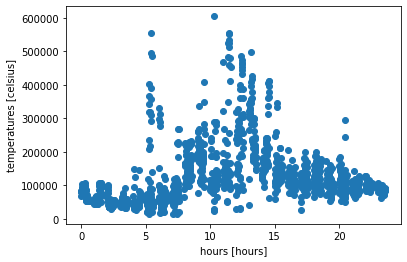

In [ ]:
import matplotlib.pylab as plt  #import library for plotting, https://pypi.org/project/matplotlib/
import numpy as np
hours = df_temperatura['time_tag'].values    #this is a numpy array (not a list), you can do mathematical operations directly on the object
temperatures = df_temperatura['temperature'].values 
hours = hours.astype(float)
temperatures = temperatures.astype(float)
plt.scatter(hours, temperatures)
plt.xlabel('hours [hours]')
plt.ylabel('temperatures [celsius]')
plt.show()


In [ ]:
#we transform the time into its amount of minutes to do a compression of the time to get good values for the future mapping 
trans_time_to_minutes('time_tag')

In [ ]:
df_temperatura = df_temperatura.sort_values(by=['time_tag'], ascending=False) #sort data from the highest amount of minutes  to the lowest


In [ ]:
df_temperatura

,time_tag,density,speed,temperature
521,1439.0,1.86,411.6,83541.0
520,1438.0,1.89,413.2,89167.0
519,1437.0,1.90,413.1,90111.0
518,1436.0,1.80,412.3,88603.0
517,1435.0,1.62,414.1,88697.0
...,...,...,...,...
524,2.0,1.97,410.5,78954.0
542,2.0,1.91,415.2,93093.0
532,1.0,2.07,415.7,94702.0
523,1.0,2.36,412.1,69059.0


**COMPRESS THE TIME**

we set a conversion factor to compress time , we this we say how much do we want to be compressed by in a particular way.

**set the conversion factor to compress the time**



In [ ]:
hours
max(hours)

23.59

In [ ]:
#number of minutes for each beat of music
many_minutes=24
t_data = df_temperatura["time_tag"]/many_minutes #rescale time from minutes to beats

In [ ]:
t_data[:25]
duration_beats = max(t_data)  #duration in beats (actually, onset of last note)
print('Duration:', duration_beats, 'beats')
#we are working with beats because we'll need to convert it to midi files for the sonification

Duration: 59.958333333333336 beats


**Normalize and scale data**

normalize the data means that it goes from zero to one , so we'll use a mapping function to normalize  the data.

In [ ]:
#general mapping function
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

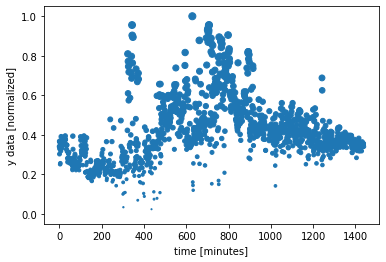

In [ ]:
y_data = map_value(df_temperatura["temperature"], min(df_temperatura["temperature"]), max(df_temperatura["temperature"]), 0, 1) #normalize data, so it runs from 0 to 1 

y_scale = 0.5  #lower than 1 to spread out more evenly

y_data = y_data**y_scale
y_temps=df_temperatura["time_tag"].values
y_temps=y_temps.astype(float)
y_data=y_data.astype(float)
plt.scatter(y_temps, y_data, s=50*y_data)
plt.xlabel('time [minutes]')
plt.ylabel('y data [normalized]')
plt.show()
# we did the scaling because if we had mapped this data the data in the botton could be mapped to the same musical note

'''
## 6) Choose musical notes for pitch mapping, convert to midi numbers
- choose the set of musical notes to map data to (it's common to use a few octaves of a certain scale but you can choose any set of notes you want depending on your goals for the sonification)
- the total number of notes sets the pitch resolution, think of this as the number of rows of pixels in an image
- these note names are converted to [midi note numbers](https://www.inspiredacoustics.com/

en/MIDI_note_numbers_and_center_frequencies ) (integers from 0 to 127, lowest note on piano = A0 = 21, C1 = 24, etc.)


(from [Müller, FMP, Springer 2015](https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP))

In [ ]:
pip install audiolazy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from audiolazy import str2midi #import function to convert note names to midi numbers (could also use: midi2str, str2freq, freq2str,freq2midi,midi2freq) https://pypi.org/project/audiolazy/

# # 4 octaves of major scale
# note_names = ['C2','D2','E2','F2','G2','A2','B2',
#              'C3','D3','E3','F3','G3','A3','B3',
#              'C4','D4','E4','F4','G4','A4','B4',
#              'C5','D5','E5','F5','G5','A5','B5']

# #4 octaves of major pentatonic scale 
# note_names = ['C2','D2','E2','G2','A2',
#              'C3','D3','E3','G3','A3',
#              'C4','D4','E4','G4','A4',
#              'C5','D5','E5','G5','A5']

#custom note set (a voicing of a Cmaj13#11 chord, notes from C lydian)
note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')

Resolution: 23 notes


**MAP THE DATA TO MIDI NOTE NUMBERS**

In [ ]:
n_measurements=len(df_temperatura)
n_measurements#how many measurements the solar parker probe is taken

1389

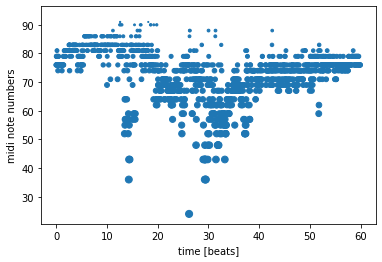

In [ ]:
midi_data = []
for i in range(n_measurements):
    note_index = round(map_value(y_data.values[i], 0, 1, n_notes-1, 0)) #notice choice of polarity: bigger temperatures are mapped to lower notes                                  #we round the result because it's a list index which must be an integer
    midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

**MAP THE DATA TO THE NOTE VELOCITIES**



*  midi velocity (integer from 0-127) is a combination of volume and intensity 
(hitting a piano key with a larger velocity makes a louder, more intense sound).
*   we are using the same data to control the note pitch and the note velocity (this is called 'dual coding').

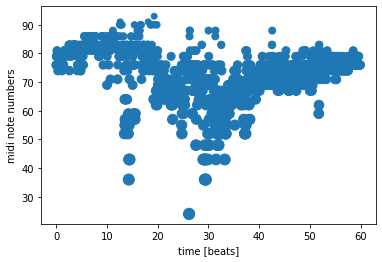

In [ ]:
vel_min,vel_max = 35,127   #minimum and maximum note velocity

vel_data = []
for i in range(n_measurements):
    note_velocity = round(map_value(y_data.values[i], 0, 1, vel_min, vel_max)) #bigger temperatures will be louder
                                                                #we round here because note velocites are integers
    vel_data.append(note_velocity)
    
plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

**SAVE DATA AS THE MIDI FILE**

In [ ]:
pip install MIDIFile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install midiutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from midiutil import MIDIFile #import library to make midi file, https://midiutil.readthedocs.io/en/1.2.1/
    
#create midi file object, add tempo
bpm = 60 
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

#add midi notes
for i in range(n_measurements):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data.values[i], duration=2, volume=vel_data[i])

#create and save the midi file itself
with open('MUSICA' + '.mid', "wb") as f:
    my_midi_file.writeFile(f) 

**Listen to MIDI file within jupyter**

In [ ]:
# pip install mixer

In [ ]:
# pip install --quiet "pygame" 

In [ ]:
# pip install pygame

In [ ]:
# import sys 
# !{sys.executable} -m pip install --quiet "pygame"  #install pygame with pip
# #or use this if you installed python with anaconda
# #conda install --yes --prefix {sys.prefix} pygame

# import pygame #import library for playing midi files, https://pypi.org/project/pygame/
# from pygame import mixer

In [ ]:
# pygame.init()
# mixer.init()
# sonido_fondo = pygame.mixer.Sound("/content/MUSICA.mid")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# pygame.mixer.music.stop()